# PART 1B - SENTIMENT ANALYSIS 
Opens all the files one by one and perfoms sentiment analysis on it. Stores the output in the following files<br>
1. ../data/sentiment_train.csv
2. ../data/sentiment_test.csv<br>

<font color ='red'>Do not run this notebook as it takes hours</font><br>
You can run the exploratory part --- <b> 3. EXPLORATORY ANALYSIS OF SENTIMENT</b>

In [2]:
# key libs
import numpy as np
import re
import nltk
import pandas as pd
import glob
import codecs

# nlp libs
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

# processing
from sklearn.model_selection import train_test_split

# textblob wrapper
from textblob import TextBlob
from nltk.tokenize import sent_tokenize


In [3]:
# set random state
RSEED =0

In [4]:
train_list = pd.read_csv('../data/train_file_list.csv')
test_list = pd.read_csv('../data/test_file_list.csv')
train_list = train_list.drop(columns ='Unnamed: 0')
test_list = test_list.drop(columns ='Unnamed: 0')

In [5]:
#train_list.head()
test_list.head()

,index,file_extension,title,author
0,480,../data/gutenberg/George Bernard Shaw___Great ...,Great Catherine,George Bernard Shaw
1,2319,../data/gutenberg/William Wymark Jacobs___Shor...,Short Cruises,William Wymark Jacobs
2,2491,../data/gutenberg/Edward Stratemeyer___Richard...,Richard Dare's Venture,Edward Stratemeyer
3,1191,../data/gutenberg/Thomas Henry Huxley___Willia...,William Harvey And The Discovery Of The Circul...,Thomas Henry Huxley
4,572,../data/gutenberg/John Galsworthy___Beyond.txt,Beyond,John Galsworthy


In [6]:
test_list.shape

(607, 4)

In [7]:
train_files = list(train_list['file_extension'])
test_files = list(test_list['file_extension'])

### 1. SENTIMENT ANALYSIS ON TRAIN
Just use a pre-trained black box<br>
<font color ='red'> Do not run</font> 

In [48]:
sentiment_train = []
for file_link in train_files:
    file=open(file_link)
    t=file.read()
    book = TextBlob(t)
    word_count = len(book.words)
    sentence_count =len(book.sentences)
    avg_len = word_count/sentence_count
    sentiment_train.append([word_count,sentence_count,avg_len,book.sentiment[0],book.sentiment[1]])
    print(file_link,'--done--')           

../data/gutenberg/Stephen Leacock___Behind the Beyond.txt --done--
../data/gutenberg/Jerome Klapka Jerome___Tommy and Co.txt --done--
../data/gutenberg/Stephen Leacock___Winsome Winnie and other New Nonsense Novels.txt --done--
../data/gutenberg/Hamlin Garland___The Moccasin Ranch.txt --done--
../data/gutenberg/Charles Dickens___Three Ghost Stories.txt --done--
../data/gutenberg/P G Wodehouse___The Man with Two Left Feet.txt --done--
../data/gutenberg/Herbert Spencer___Essays: Scientific, Political, & Speculative, Volume I.txt --done--
../data/gutenberg/William Dean Howells___The Lady of the Aroostook.txt --done--


KeyboardInterrupt: 

In [ ]:
df_train = pd.DataFrame(sentiment_train, columns = ['word_count','sentence_count','sentence_length','polarity','subjectivity'])
df_train.insert(loc=0, column='book_location', value=train_list['file_extension'])
df_train.insert(loc=0, column='author_name', value=train_list['author'])
df_train.insert(loc=0, column='book_title', value=train_list['title'])

In [ ]:
df_train.head()

In [ ]:
df_train.to_csv('../data/sentiment_train.csv')

### 2. SENTIMENT ANALYSIS ON TEST
Just use a pre-trained black box<br>
<font color ='red'> Do not run</font> 

In [ ]:
sentiment_test = []
for file_link in test_files:
    file=open(file_link)
    t=file.read()
    book = TextBlob(t)
    word_count = len(book.words)
    sentence_count =len(book.sentences)
    avg_len = word_count/sentence_count
    sentiment_test.append([word_count,sentence_count,avg_len,book.sentiment[0],book.sentiment[1]])
    print(file_link,'--done--')

In [ ]:
df_test = pd.DataFrame(sentiment_test, columns = ['word_count','sentence_count','sentence_length','polarity','subjectivity'])
df_test.insert(loc=0, column='book_location', value=test_list['file_extension'])
df_test.insert(loc=0, column='author_name', value=test_list['author'])
df_test.insert(loc=0, column='book_title', value=test_list['title'])

In [ ]:
df_test.shape

In [ ]:
df_test.head()

In [ ]:
df_test.to_csv('../data/sentiment_test.csv')

### 3. EXPLORATORY ANALYSIS OF SENTIMENT
<font color ='blue'> OK to run</font> 

In [8]:
# load train sentiment
df_1 = pd.read_csv('../data/sentiment_train.csv')
df_1 = df_1.drop(columns='Unnamed: 0')
df_1.shape

(2428, 8)

In [9]:
# load test
df_2 = pd.read_csv('../data/sentiment_test.csv')
df_2 = df_2.drop(columns='Unnamed: 0')
df_2.shape

(607, 8)

In [11]:
# join train and test
df = pd.concat([df_1,df_2],axis=0)
print(df.shape)
df.head()
df.to_csv('../data/sentiment_full.csv')

(3035, 8)


In [12]:
gp1 = df.groupby(['author_name']).mean().sort_values(by='polarity',ascending=False).reset_index()
# send to csv for presentation
gp1.to_csv('../images/polarity.csv')

In [13]:
gp1.head()

,author_name,word_count,sentence_count,sentence_length,polarity,subjectivity
0,William Penn,15500.500000,401.500000,37.964090,0.189838,0.544555
1,Elizabeth Barrett Browning,65227.571429,3359.428571,18.194058,0.166804,0.543689
2,Benjamin Disraeli,100265.411765,5630.764706,18.109898,0.153961,0.525842
3,Ralph Waldo Emerson,54129.428571,2542.000000,21.818243,0.153179,0.509117
4,Richard Brinsley Sheridan,23913.400000,2473.200000,9.511750,0.152643,0.555538


In [14]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style("white")

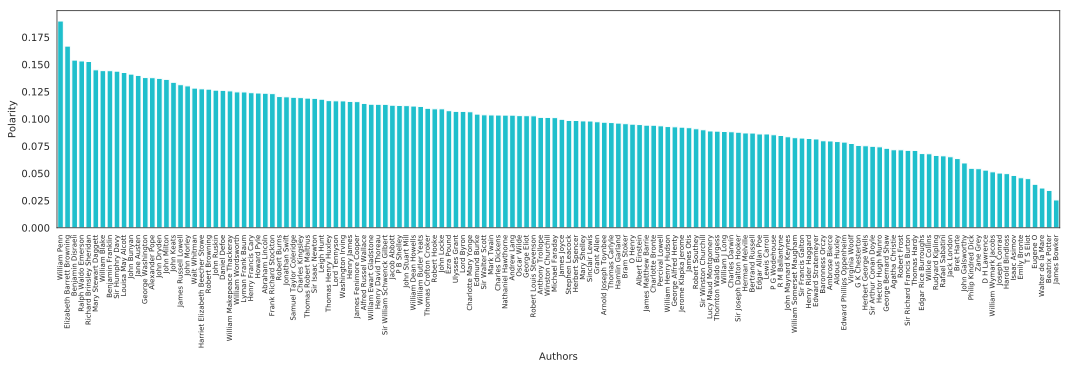

In [15]:
fig, ax = plt.subplots(figsize=[18,4]);
#sns.set(style="whitegrid")
ax.set_xticklabels(gp1['author_name'],rotation=90, fontsize=7)
#ax.set_yticklabels(labels=)
ax = sns.barplot(x="author_name", y="polarity", data=gp1, color ='#02d8e9');
plt.xlabel("Authors")
plt.ylabel("Polarity")
plt.savefig('../images/polarity.svg', format='svg',transparent=True )

In [16]:
gp2 = df.groupby(['author_name']).mean().sort_values(by='subjectivity',ascending=False).reset_index()
# send to csv for presentation
gp2.to_csv('../images/subjectivity.csv')

In [17]:
gp2.head()

,author_name,word_count,sentence_count,sentence_length,polarity,subjectivity
0,Richard Brinsley Sheridan,23913.400000,2473.200000,9.511750,0.152643,0.555538
1,Sir William Schwenck Gilbert,23130.000000,1212.000000,19.387336,0.113313,0.547260
2,William Penn,15500.500000,401.500000,37.964090,0.189838,0.544555
3,Elizabeth Barrett Browning,65227.571429,3359.428571,18.194058,0.166804,0.543689
4,Jane Austen,97997.625000,4334.000000,23.199268,0.139894,0.534898


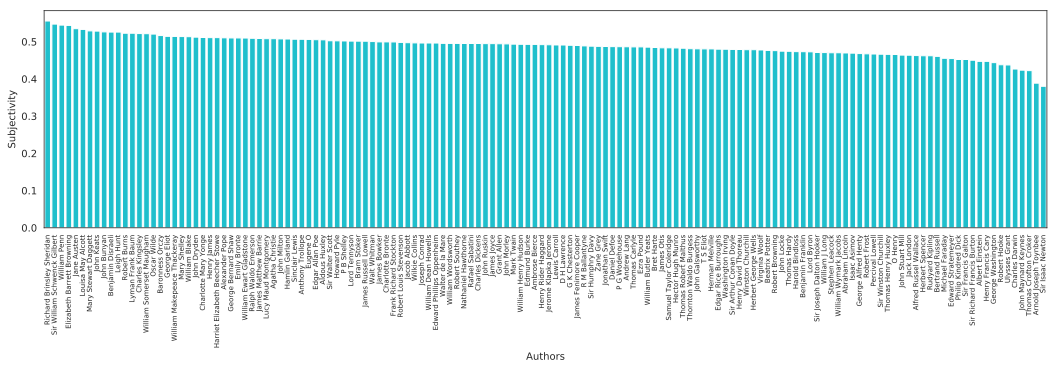

In [18]:
fig, ax = plt.subplots(figsize=[18,4])
#sns.set(style="whitegrid")
ax.set_xticklabels(gp2['author_name'],rotation=90, fontsize=7)
ax = sns.barplot(x="author_name", y="subjectivity", data=gp2,color ='#02d8e9')
plt.xlabel("Authors")
plt.ylabel("Subjectivity")
plt.savefig('../images/subjectivity.svg', format='svg',transparent=True  )

In [19]:
gp3 = df.groupby(['author_name']).mean().sort_values(by='sentence_length',ascending=False).reset_index()
gp3.head()

# send to csv for presentation
gp3.to_csv('../images/length.csv')

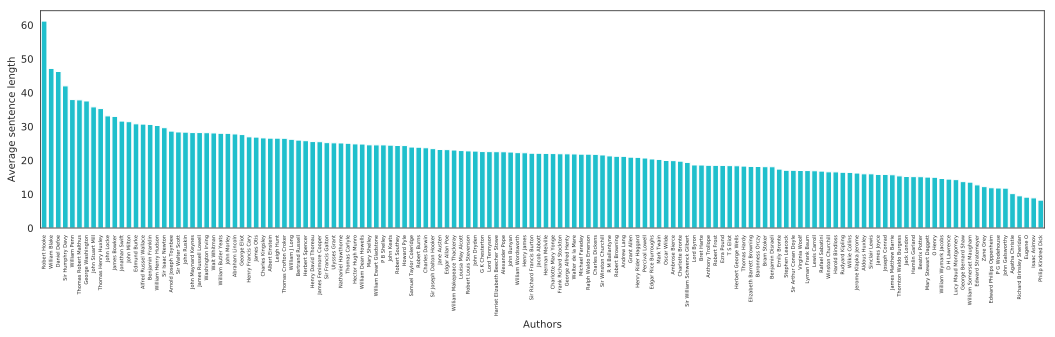

In [20]:
fig, ax = plt.subplots(figsize=[18,4])
#sns.set(style="whitegrid")
ax.set_xticklabels(gp2['author_name'],rotation=90, fontsize=5)
ax = sns.barplot(x="author_name", y="sentence_length", data=gp3,color ='#02d8e9')
plt.xlabel("Authors")
plt.ylabel("Average sentence length")
plt.savefig('../images/length.svg', format='svg',transparent=True )

### next -> featurize_cluster.ipynb